# Stock price prediction

----CodeAlpha ..Task 2

#--Afzal Hussain Ansari

# Importing libraries 

In [21]:
# here we are importing important libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
sns.set_style('whitegrid')
%matplotlib inline
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [22]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf

# Set the list of tech stocks
Tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set the start and end dates
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Create an empty dictionary to store the dataframes
stock_data = {}

# Fetch the data for each stock and store it in the dictionary
for stock in Tech_list:
    stock_data[stock] = yf.download(stock, start=start, end=end)

# Access the dataframes using the stock symbols
AAPL = stock_data['AAPL']
GOOG = stock_data['GOOG']
MSFT = stock_data['MSFT']
AMZN = stock_data['AMZN']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [23]:
# here we are making list of our company
Company_list = [AAPL,GOOG,MSFT,AMZN]
company_name = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
for company, comp_name in zip(Company_list,company_name):
    company["company_name"] = comp_name
    
df = pd.concat(Company_list,axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-04-17,184.309998,184.570007,179.820007,181.279999,181.279999,31359700,AMZN
2024-04-18,181.470001,182.389999,178.649994,179.220001,179.220001,30723800,AMZN
2024-04-19,178.740005,179.000000,173.440002,174.630005,174.630005,55950000,AMZN
2024-04-22,176.940002,178.869995,174.559998,177.229996,177.229996,37924900,AMZN
2024-04-23,178.080002,179.929993,175.979996,179.539993,179.539993,37046500,AMZN
2024-04-24,179.940002,180.320007,176.179993,176.589996,176.589996,34185100,AMZN
2024-04-25,169.679993,173.919998,166.320007,173.669998,173.669998,49249400,AMZN
2024-04-26,177.800003,180.820007,176.130005,179.619995,179.619995,42033000,AMZN
2024-04-29,182.750000,183.529999,179.389999,180.960007,180.960007,54063900,AMZN


In [24]:
# here we are summarize stats 
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,181.157937,182.623135,179.790794,181.254603,180.868390,5.789828e+07
std,8.708965,8.562904,8.684987,8.667749,8.626585,1.764123e+07
min,164.889999,166.399994,164.080002,165.000000,164.909744,2.404830e+07
25%,173.327503,175.072506,172.050003,173.637505,173.282696,4.678918e+07
50%,180.379997,182.079994,178.440002,180.640007,180.048973,5.368500e+07
75%,189.277496,189.990005,187.652500,189.317501,188.879906,6.465378e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


In [25]:
# here we are printing information of our dataset
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-05-01 to 2024-04-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


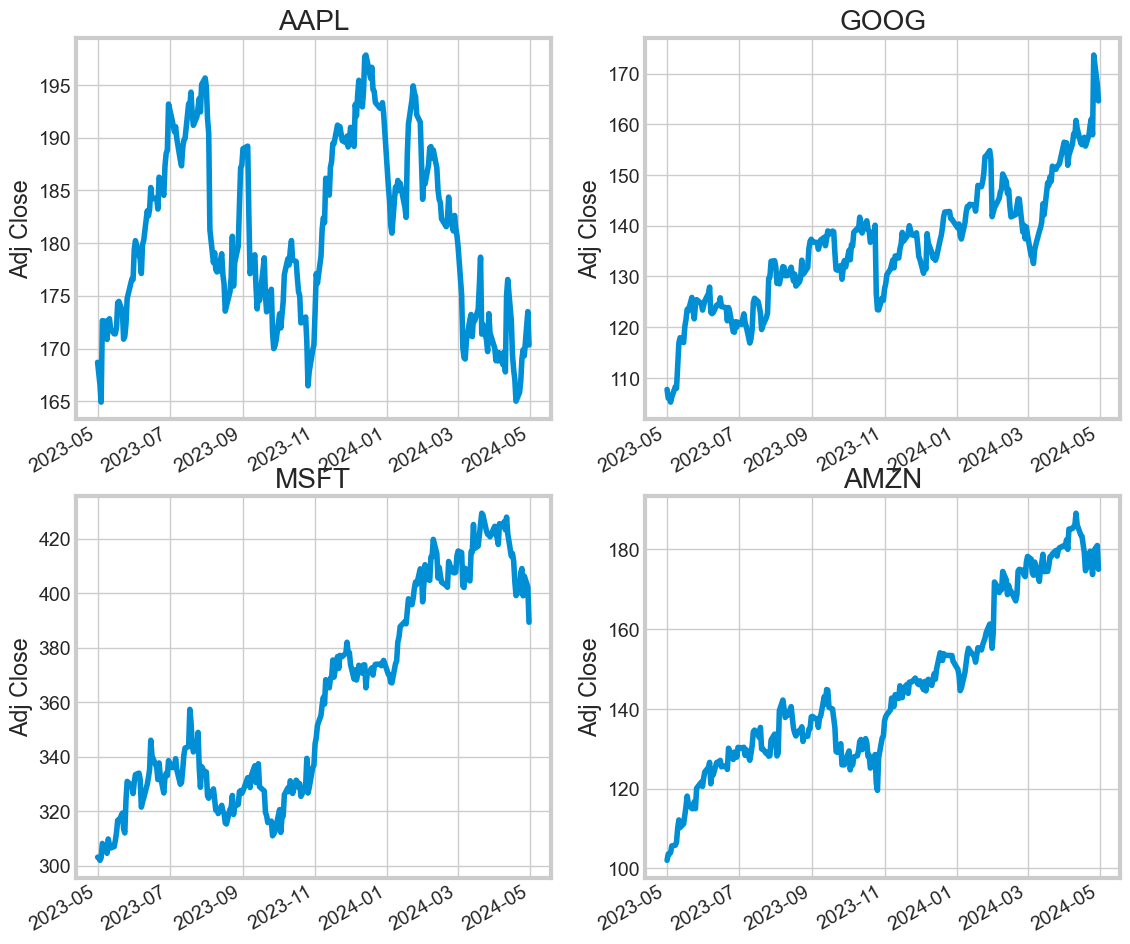

In [26]:
# here we are visualising of closing price
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(Company_list, 1):
    plt.subplot(2, 2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{Tech_list[i - 1]}")

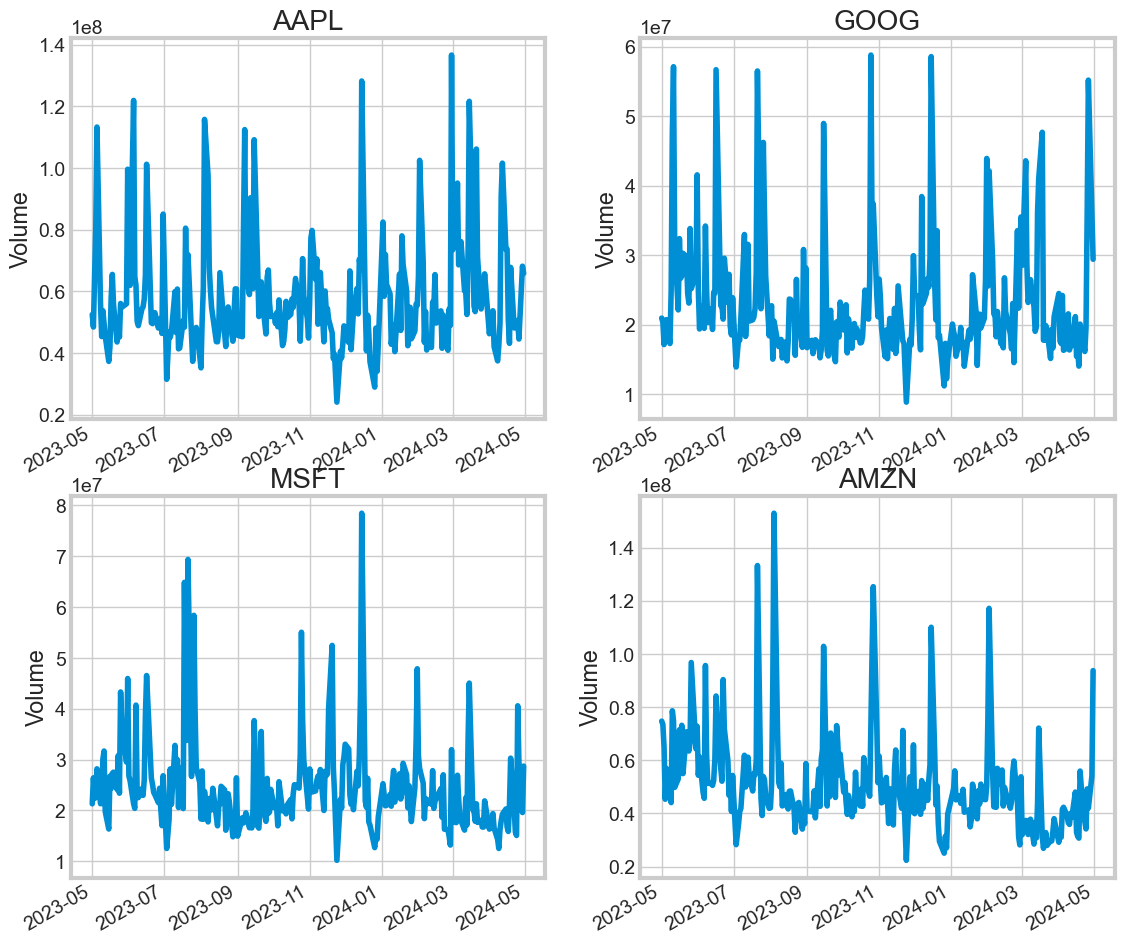

In [27]:
# here we are visualising total volume of stock being trade each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(Company_list, 1):
    plt.subplot(2, 2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{Tech_list[i - 1]}")

In [28]:
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in Company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [29]:
# here we are printing columns of google company
print(GOOG.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


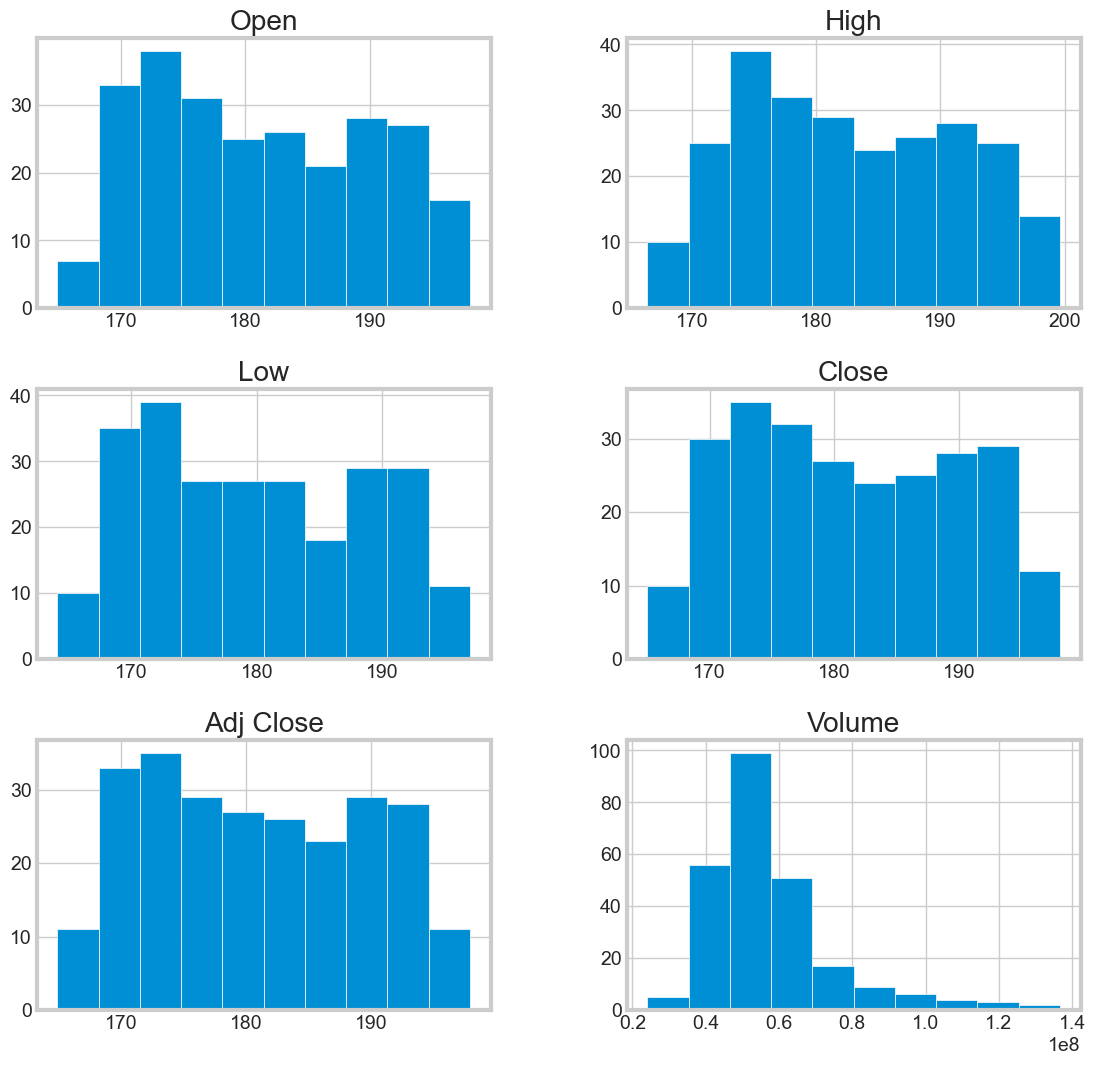

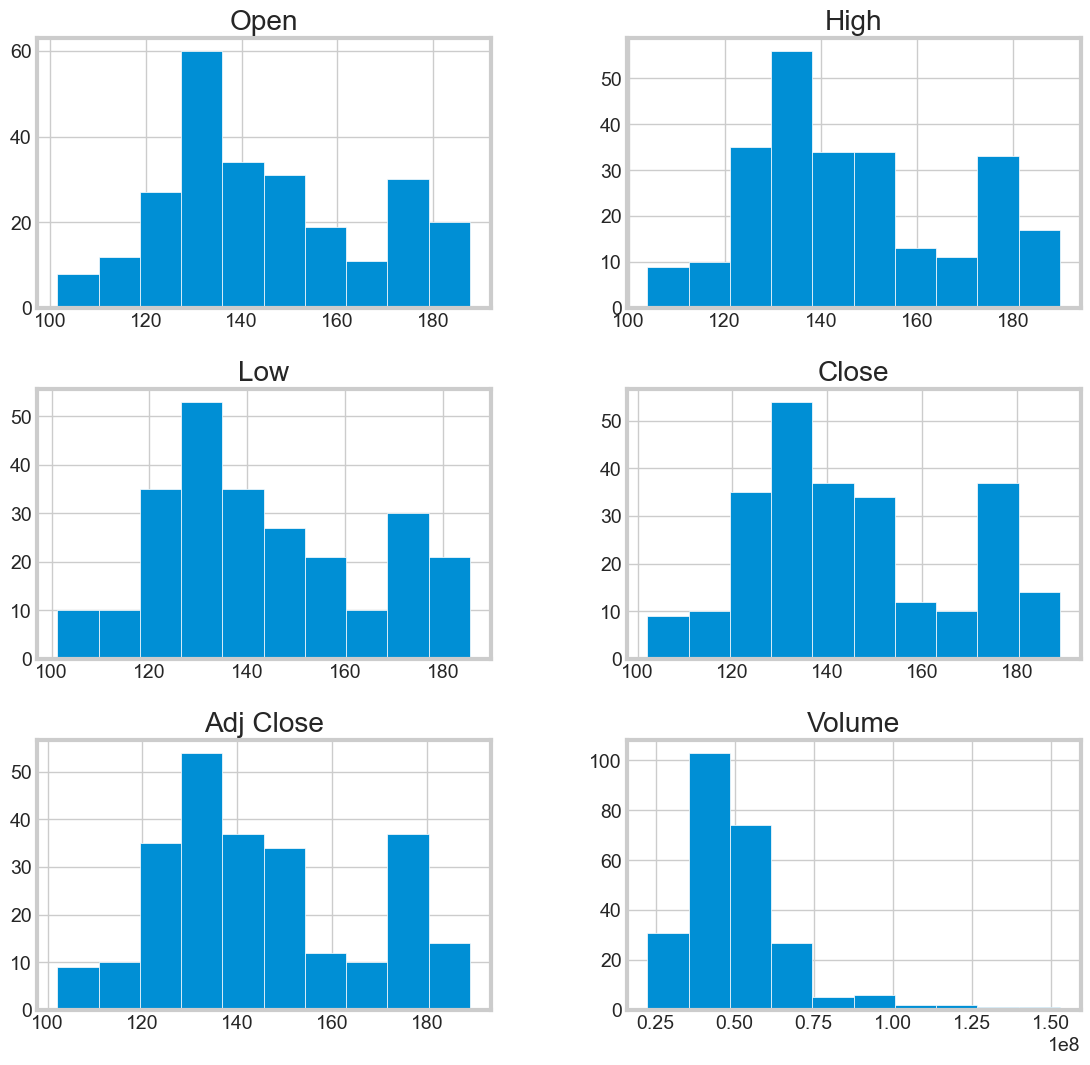

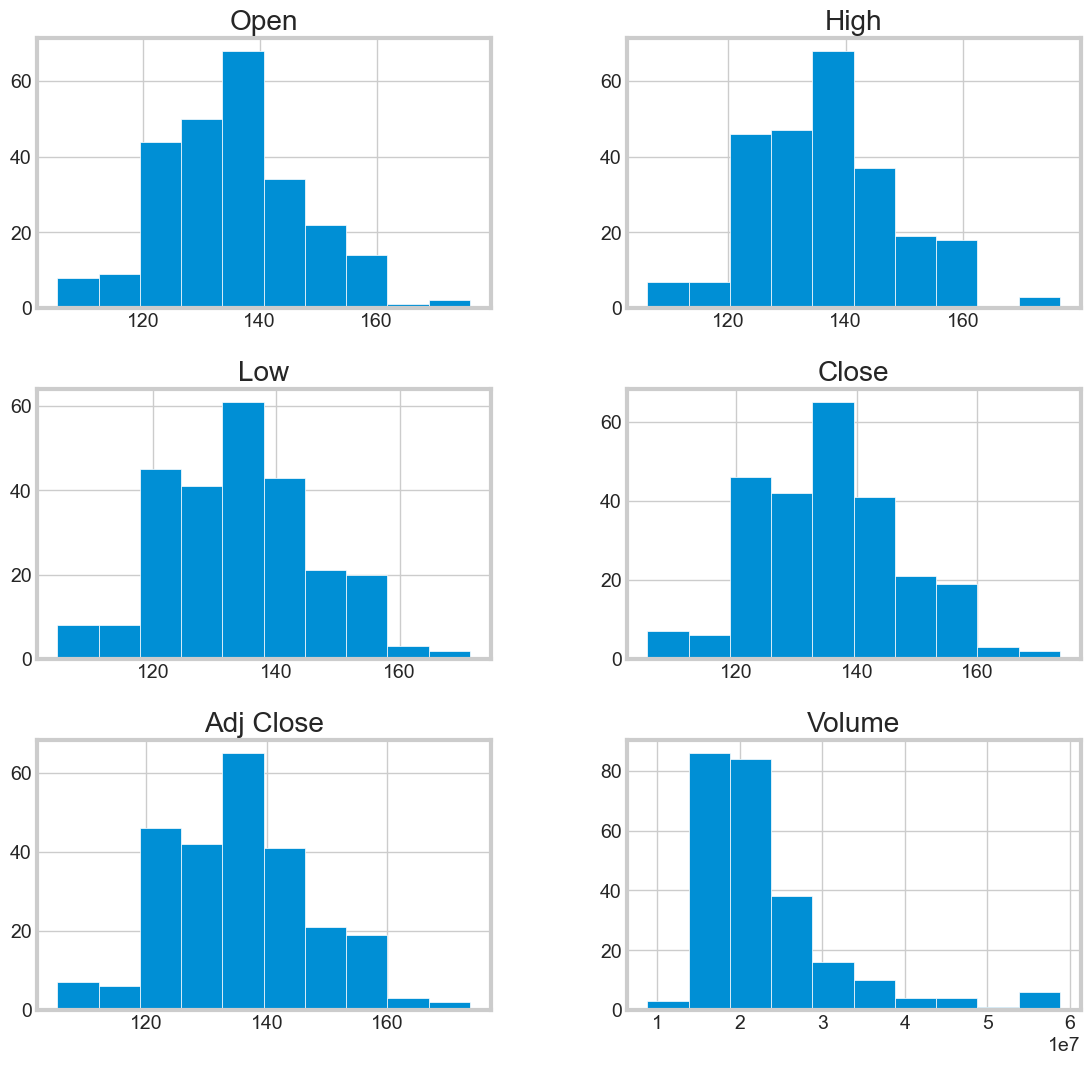

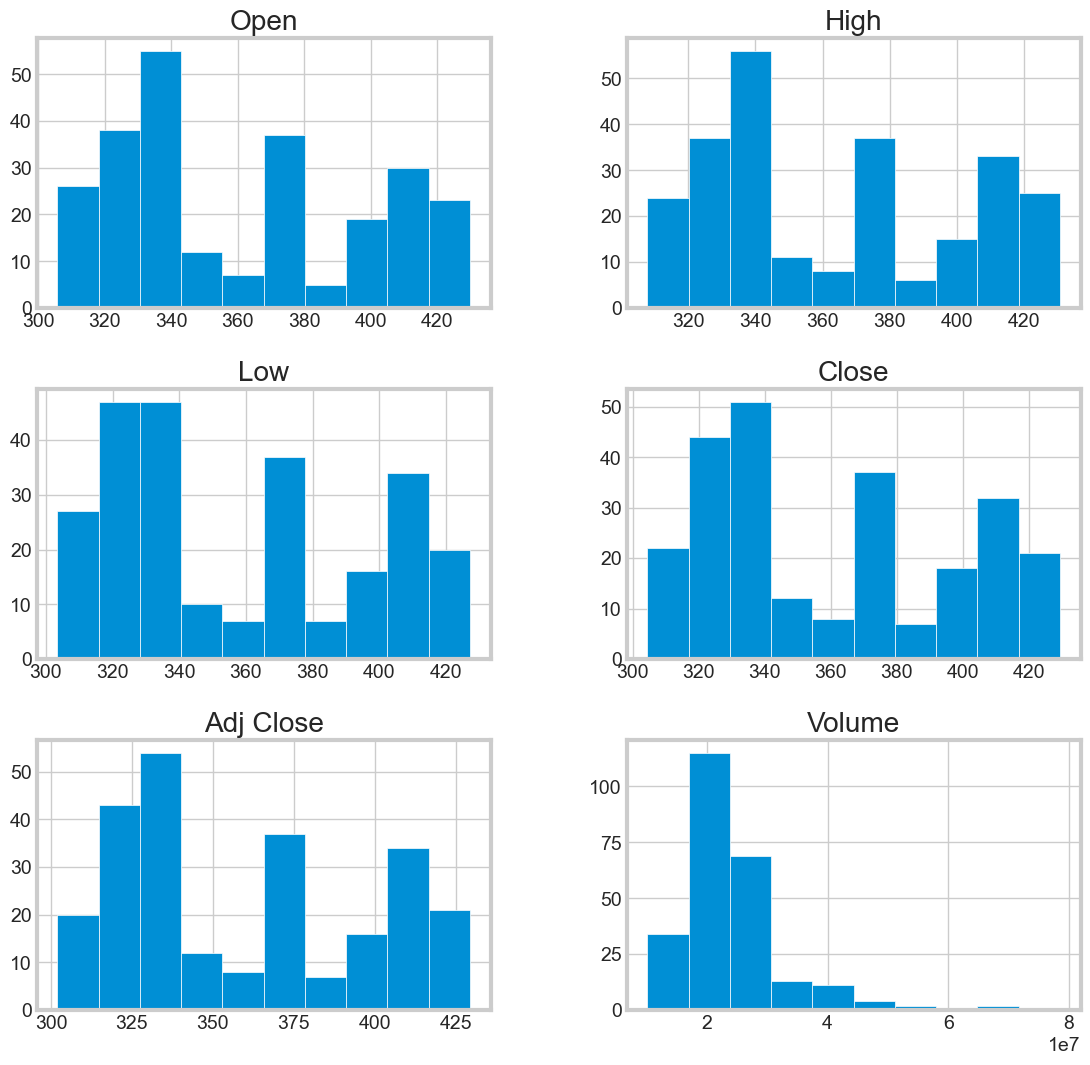

In [30]:
# here we are visualising the additional moving averages
df.groupby("company_name").hist(figsize=(12, 12));

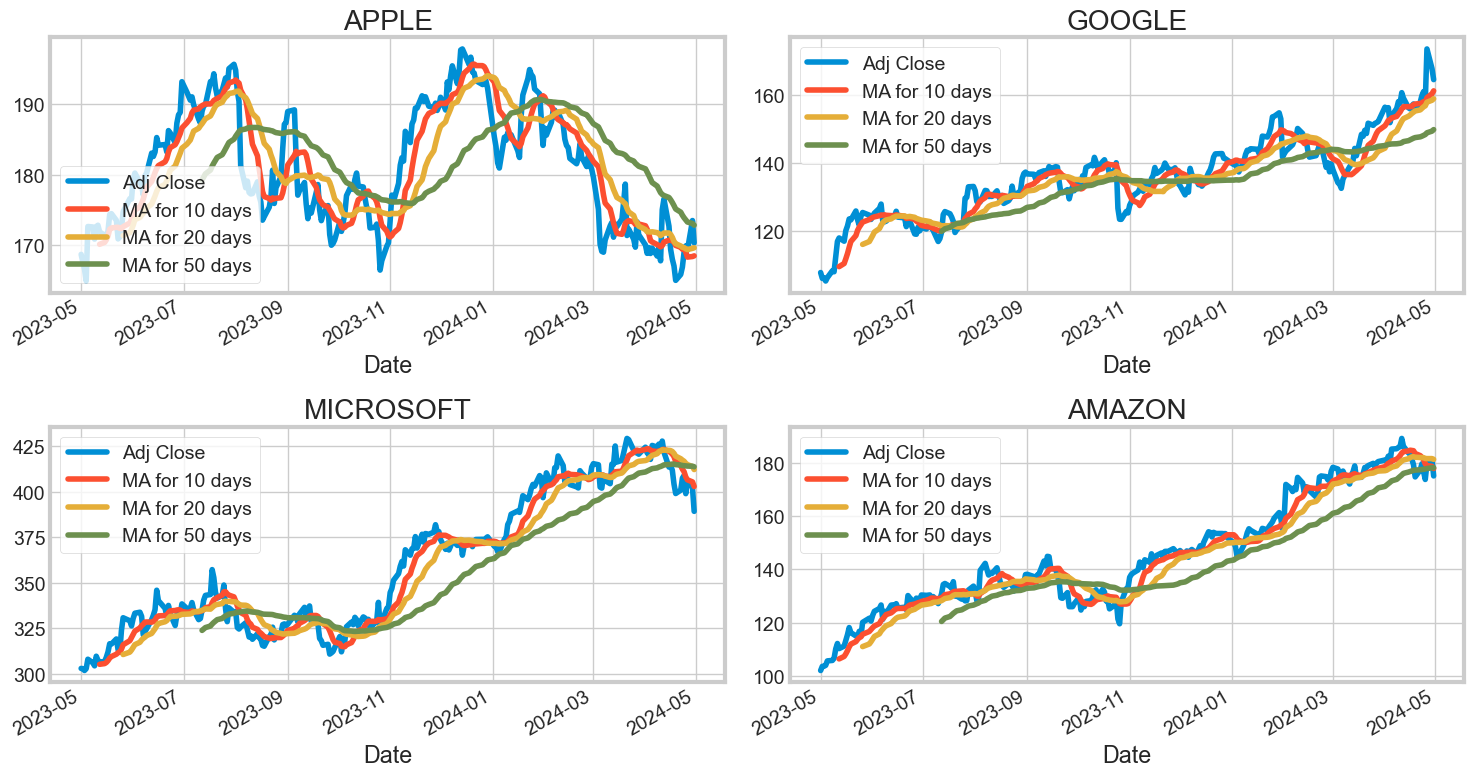

In [31]:
# here we are visualising three important moving averages of all the company
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

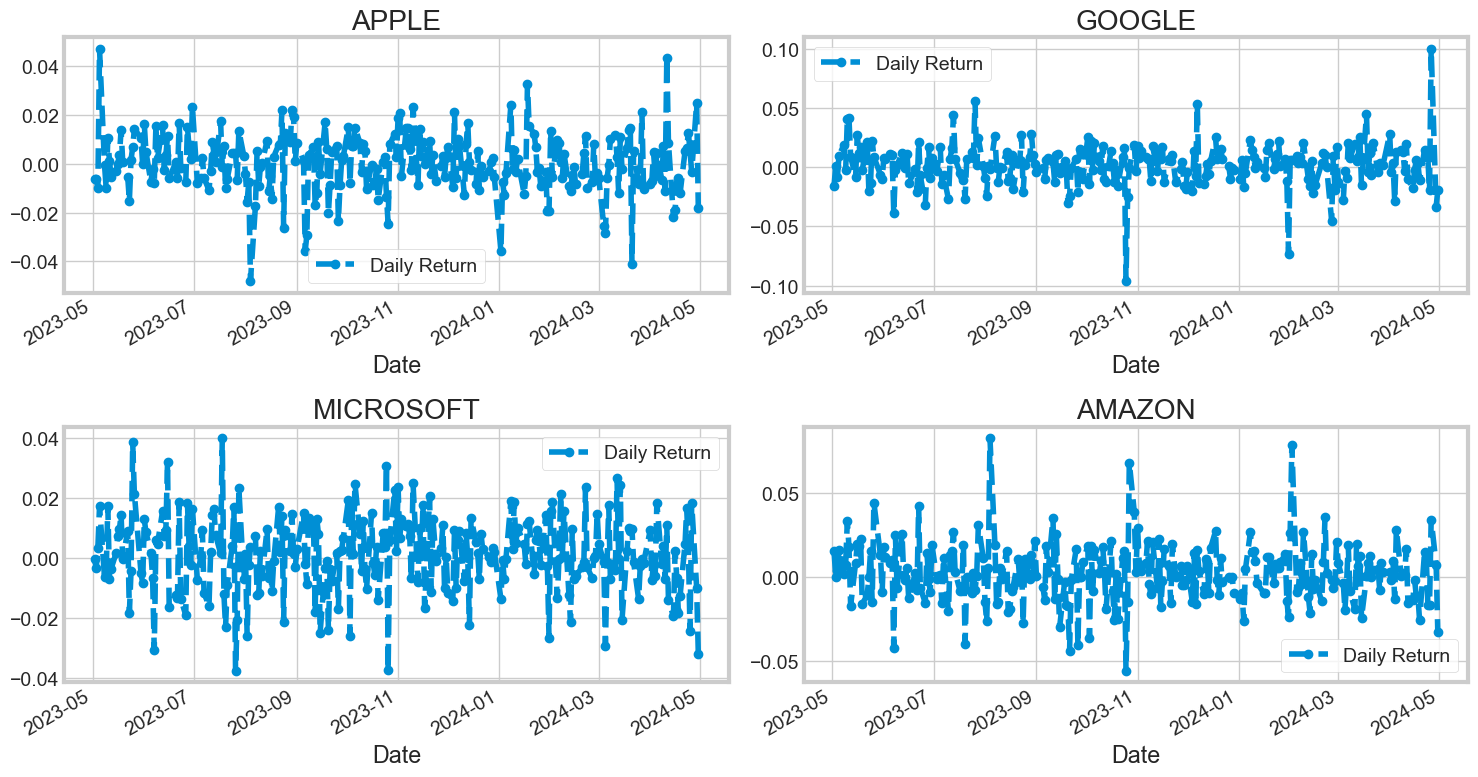

In [32]:
# We'll use pct_change to find the percent change for each day
for company in Company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

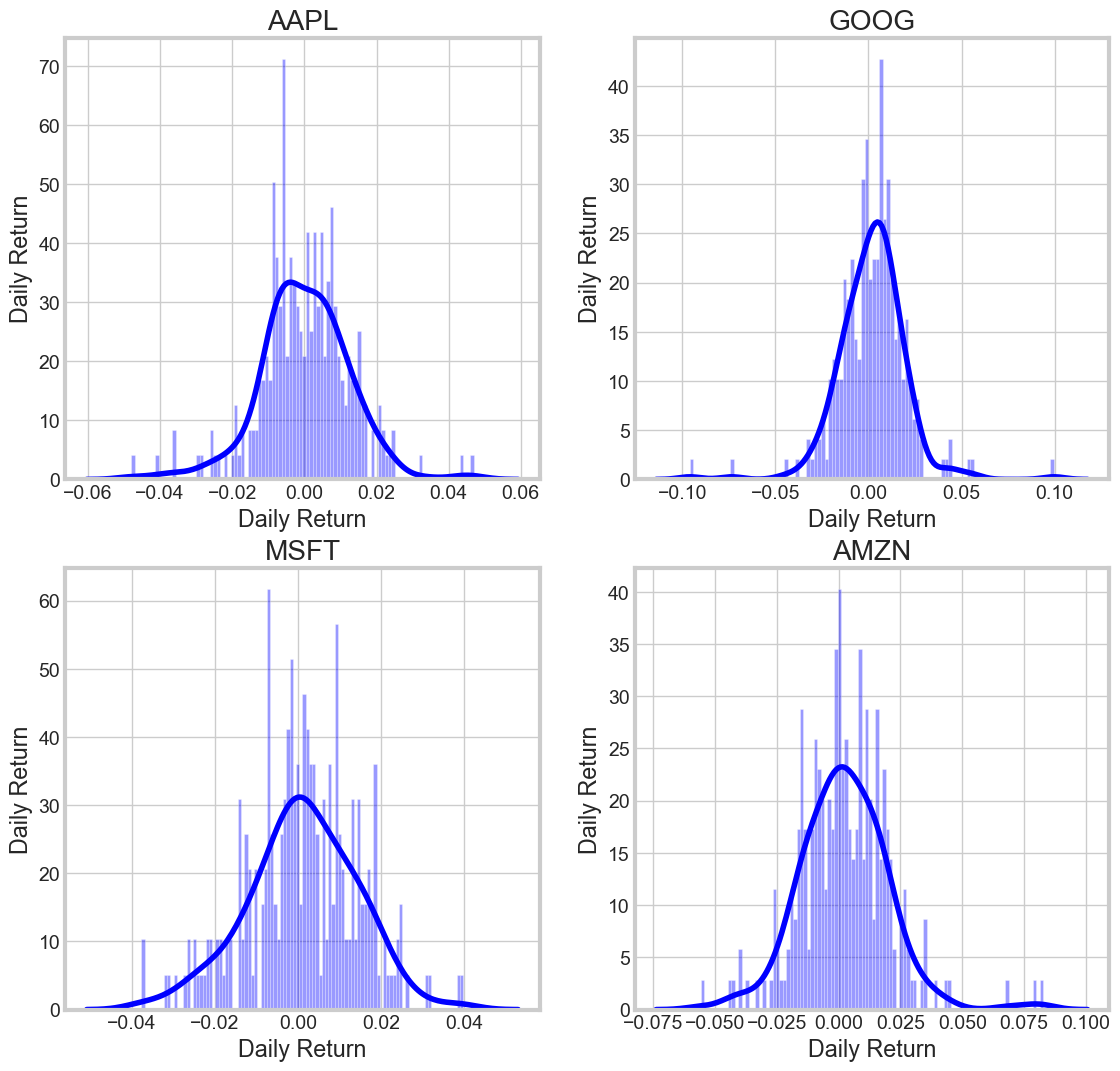

In [33]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 12))

for i, company in enumerate(Company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='blue')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

In [34]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf

# Set the list of tech stocks
Tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set the start and end dates
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Create an empty DataFrame to store the closing prices
closing_df = pd.DataFrame()

# Fetch the closing prices for each stock and store them in the DataFrame
for stock in Tech_list:
    data = yf.download(stock, start=start, end=end)
    closing_df[stock] = data['Adj Close']

# Print the first five rows of the DataFrame
print(closing_df.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                  AAPL        GOOG        MSFT        AMZN
Date                                                      
2023-05-01  168.689590  107.709999  303.072571  102.050003
2023-05-02  167.645142  105.980003  302.923798  103.629997
2023-05-03  166.560944  106.120003  301.921997  103.650002
2023-05-04  164.909760  105.209999  302.923798  104.000000
2023-05-05  172.648468  106.214996  308.121155  105.660004


In [35]:
# here we are Making a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2023-05-01,NaN,NaN,NaN,NaN
2023-05-02,-0.006192,-0.016062,-0.000491,0.015483
2023-05-03,-0.006467,0.001321,-0.003307,0.000193
2023-05-04,-0.009913,-0.008575,0.003318,0.003377
2023-05-05,0.046927,0.009552,0.017157,0.015962


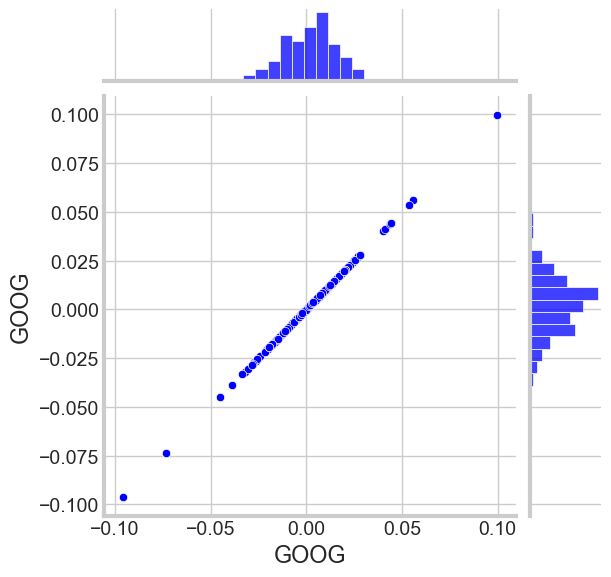

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the Google stock returns
google_rets = tech_rets['GOOG']

# Create a jointplot to compare Google to itself
sns.jointplot(x=google_rets, y=google_rets, kind='scatter', color='blue')

# Show the plot
plt.show()


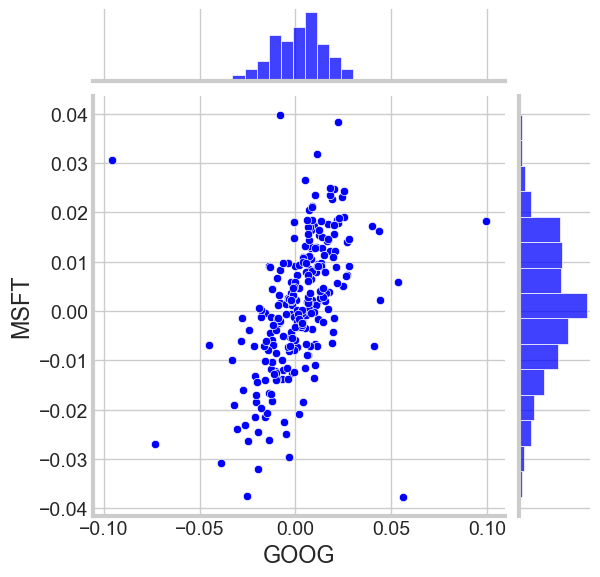

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a jointplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter', color='blue')

# Show the plot
plt.show()


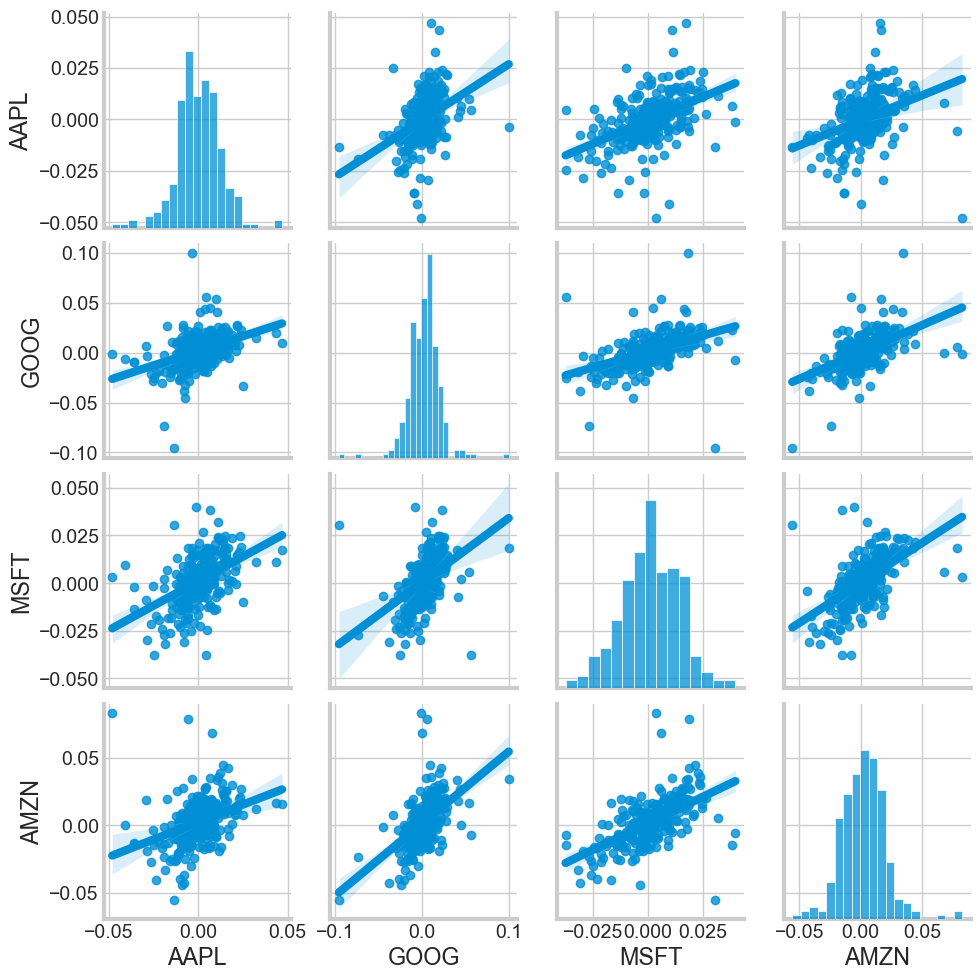

In [38]:
# Here we are simply calling pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons
sns.pairplot(tech_rets, kind='reg')

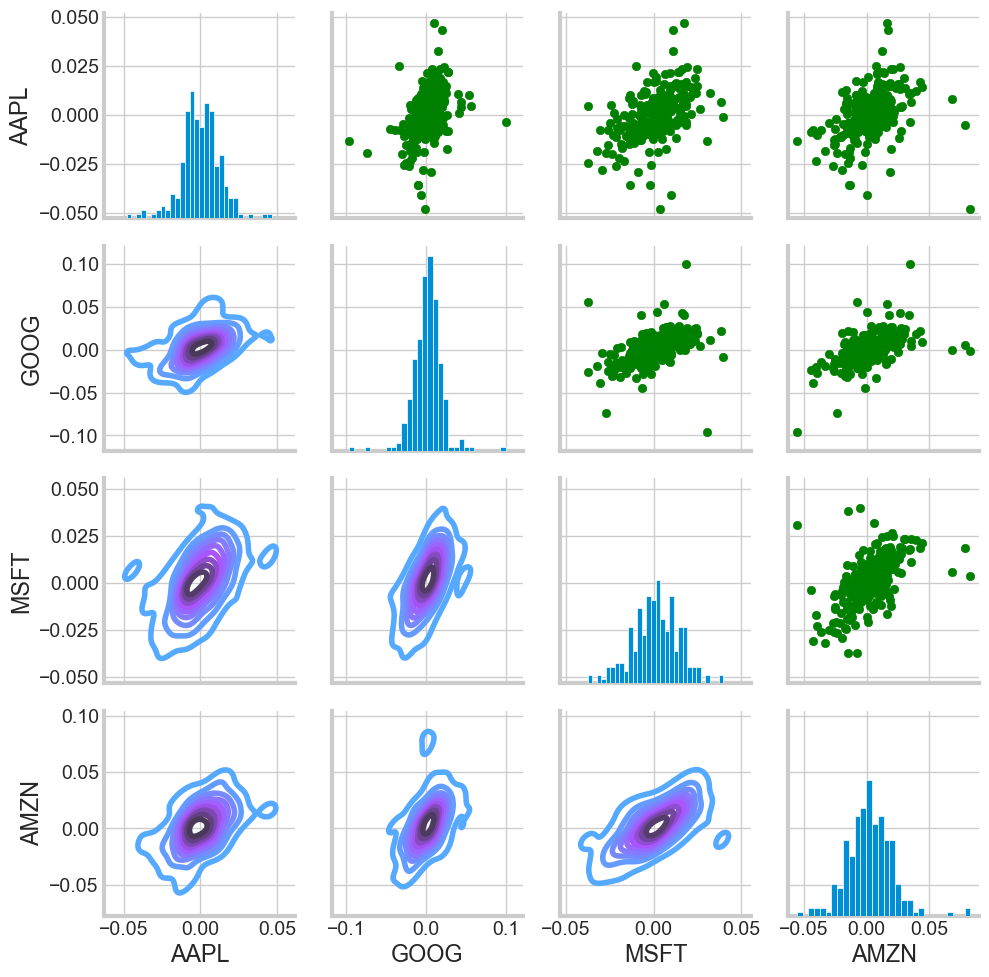

In [39]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='green')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

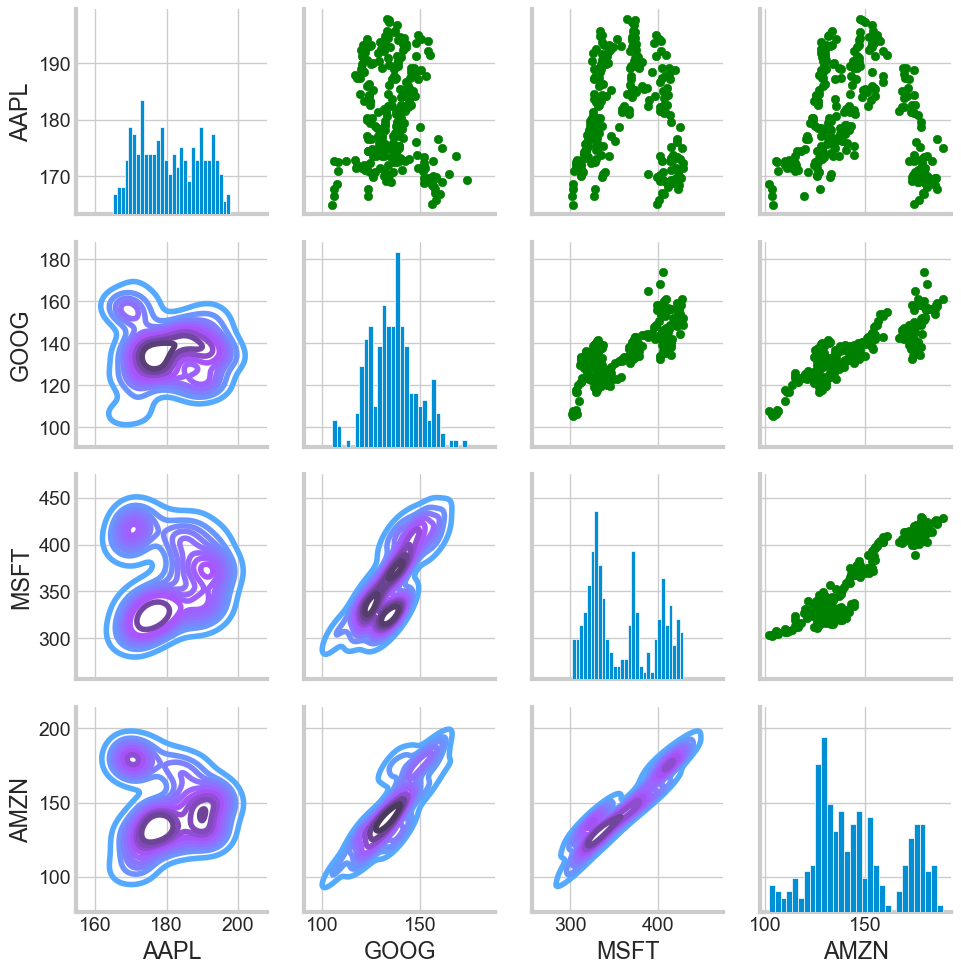

In [40]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='green')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

<Axes: >

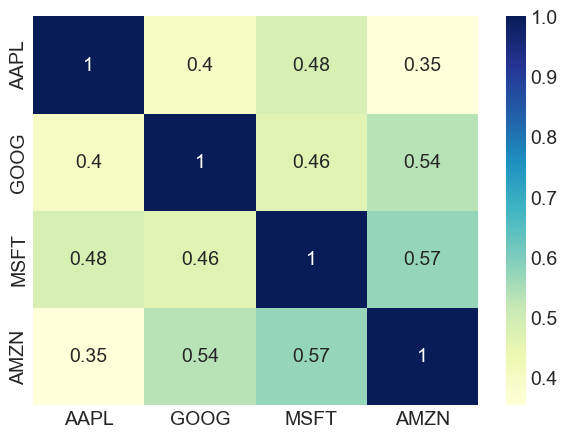

In [41]:
# Here we are using seabron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap="YlGnBu")

<Axes: >

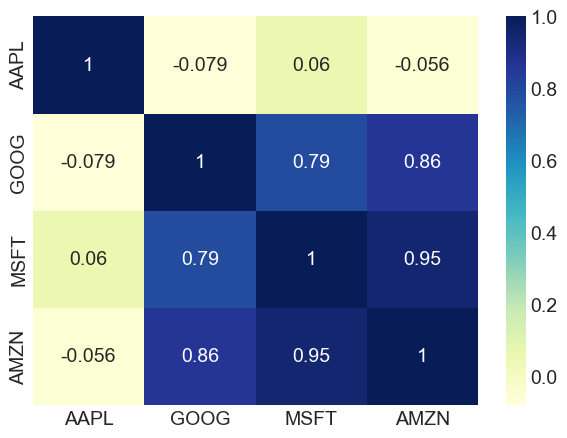

In [42]:
sns.heatmap(closing_df.corr(), annot=True, cmap="YlGnBu")

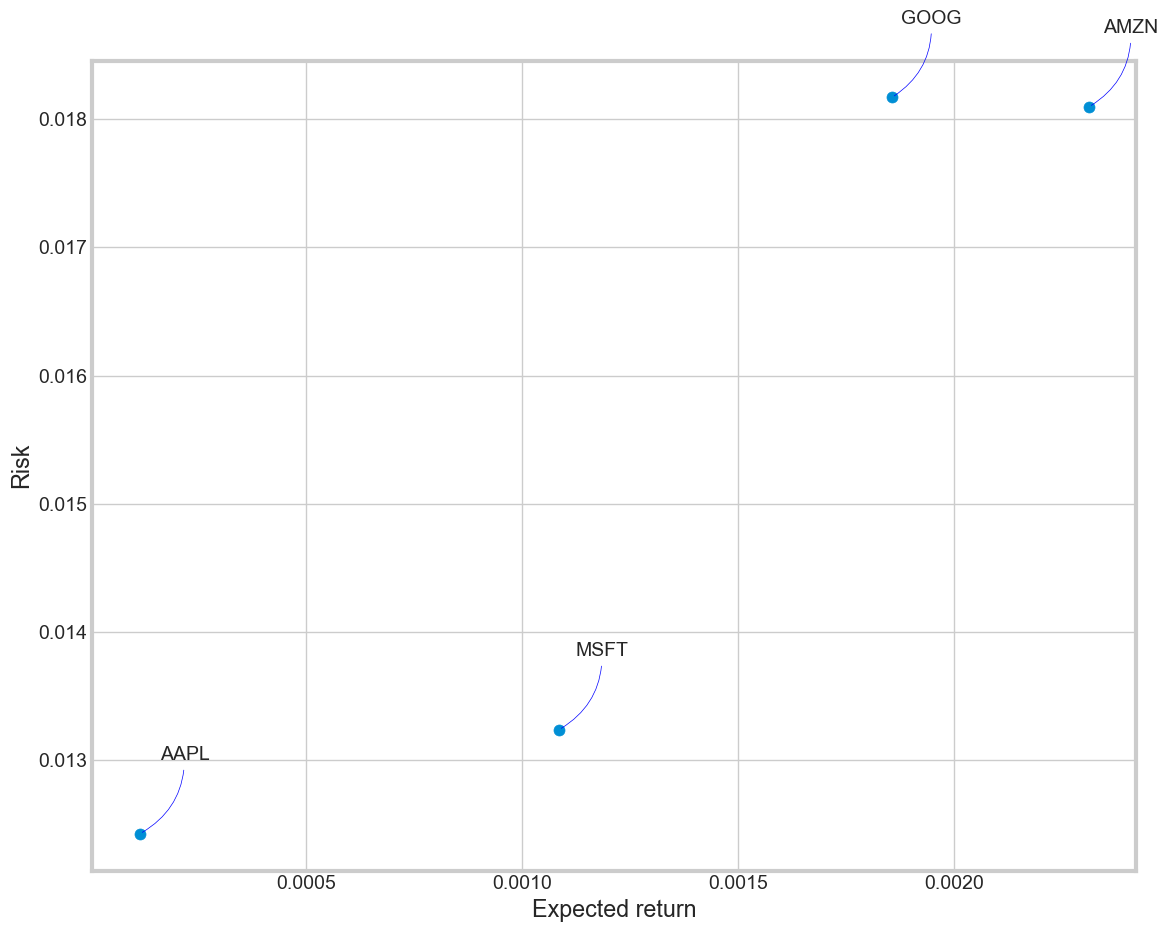

In [43]:
# Here e are defining a new DataFrame as a cleaned version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Building Models

In [44]:
import yfinance as yf

# Fetching the stock quote
symbol = 'AAPL'
start_date = '2012-01-01'
end_date = '2023-07-01'
df = yf.download(symbol, start=start_date, end=end_date)

# Printing the data
print(df)


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.433824   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.500647   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.639430   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.771554   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.751300   
...                ...         ...         ...         ...         ...   
2023-06-26  186.830002  188.050003  185.229996  185.270004  184.541229   
2023-06-27  185.889999  188.389999  185.669998  188.059998  187.320251   
2023-06-28  187.929993  189.899994  187.600006  189.250000  188.505585   
2023-06-29  189.080002  190.070007  188.940002  189.589996  188.844254   
2023-06-30  191.630005  194.479996  191.259995  193.970001  193.207031   

               Volume  
Date         

In [45]:
# here we are printing shape of data
df.shape

(2892, 6)

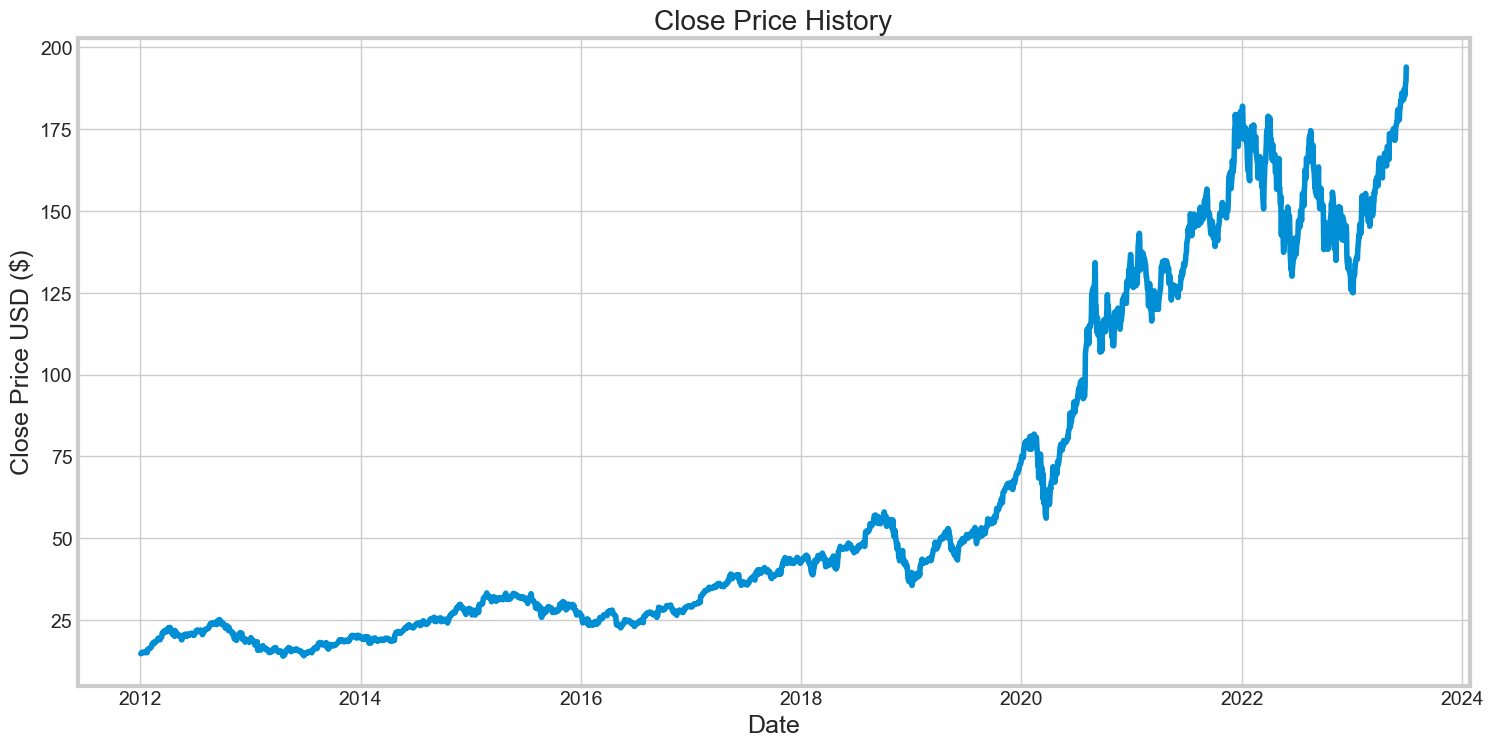

In [46]:
#here we are Visualising the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [47]:
#Creating a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)
training_data_len

2314

In [48]:
# here we are Scaling the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00410663],
       [0.00454506],
       [0.00545566],
       ...,
       [0.97378105],
       [0.97566968],
       [1.        ]])

In [49]:
#Creating the scaled training data set
train_data = scaled_data[0:training_data_len  , : ]
#Spliting the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00410663, 0.00454506, 0.00545566, 0.00632262, 0.0061897 ,
       0.00648927, 0.00635238, 0.00612225, 0.00580879, 0.00677891,
       0.00765381, 0.007384  , 0.005906  , 0.00731654, 0.00592783,
       0.01113551, 0.01073279, 0.01125851, 0.01239527, 0.01308368,
       0.01302615, 0.01281387, 0.01371852, 0.0145696 , 0.01553377,
       0.01709112, 0.02036253, 0.02041213, 0.02223333, 0.02359427,
       0.02125528, 0.02215596, 0.02213811, 0.02466359, 0.0243045 ,
       0.0249691 , 0.02616339, 0.026828  , 0.02874244, 0.0301371 ,
       0.03053983, 0.03068069, 0.02829607, 0.02772074, 0.02780605,
       0.03004784, 0.03067871, 0.0320337 , 0.03522774, 0.03948911,
       0.03869159, 0.03869357, 0.04177454, 0.04273871, 0.04205228,
       0.04142538, 0.04077268, 0.04294106, 0.04442897, 0.04505191])]
[0.043512415186967204]

[array([0.00410663, 0.00454506, 0.00545566, 0.00632262, 0.0061897 ,
       0.00648927, 0.00635238, 0.00612225, 0.00580879, 0.00677891,
       0.00765381, 0.007384  , 0.0

In [50]:
#Here we are Converting x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [51]:
# Here we are reshaping the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [52]:
#now we are Building the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [53]:
# here we are Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [54]:
# here we are training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2254/2254 ━━━━━━━━━━━━━━━━━━━━ 96s 38ms/step - loss: 0.0015


In [56]:
# here we are testing data set
test_data = scaled_data[training_data_len - 60: , : ]
#Creating the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [57]:
# here we are converting x_test to a numpy array  
x_test = np.array(x_test)

In [58]:
# here we are reshaping the data into the shape accepted by the LSTM  
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [59]:
# now we are getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step


In [60]:
# here we are calculaing the value of RMSE 
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

13.569290234542342

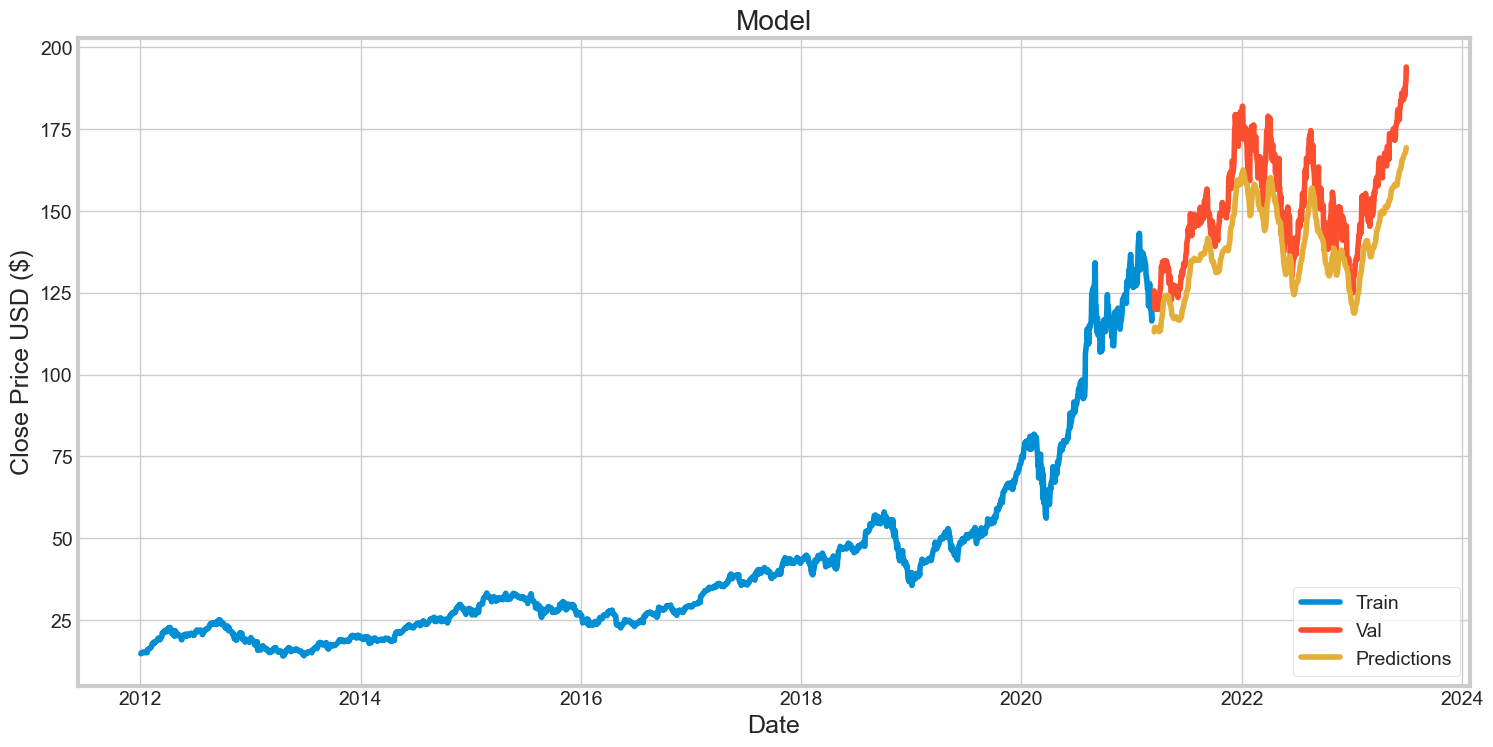

In [61]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [62]:
print(valid)

                 Close  Predictions
Date                               
2021-03-16  125.570000   113.036003
2021-03-17  124.760002   113.682930
2021-03-18  120.529999   114.331703
2021-03-19  119.989998   114.476204
2021-03-22  123.389999   114.291443
...                ...          ...
2023-06-26  185.270004   167.643295
2023-06-27  188.059998   167.834473
2023-06-28  189.250000   168.208817
2023-06-29  189.589996   168.734726
2023-06-30  193.970001   169.304733

[578 rows x 2 columns]
